In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import gsw

$$
\begin{align}
\frac{Dk}{Dt} = - \frac{\partial \omega}{\partial x} = -\frac{1}{2}V_{xx} - \frac{1}{2}V_{zz}\frac{k^2}{m^2} + \frac{1}{2}V_{xz}\frac{k}{m}
% \frac{Dm}{Dt} = - \frac{\partial \omega}{\partial z} = -\frac{1}{2}V_{xz} - \frac{1}{2f}N^2_z\frac{k^2}{m^2} + \frac{1}{2}V_{zz}\frac{k}{m}
\end{align}
$$
$$
\begin{align}
% \frac{Dk}{Dt} = - \frac{\partial \omega}{\partial x} = -\frac{1}{2}V_{xx} - \frac{1}{2}V_{zz}\frac{k^2}{m^2} + \frac{1}{2}V_{xz}\frac{k}{m}
\frac{Dm}{Dt} = - \frac{\partial \omega}{\partial z} = -\frac{1}{2}V_{xz} - \frac{1}{2f}N^2_z\frac{k^2}{m^2} + \frac{1}{2}V_{zz}\frac{k}{m}
\end{align}
$$

$$
\begin{align}
\frac{Dx}{Dt} = c_{g_x}, \frac{Dz}{Dt} = c_{g_z} 
\end{align}
$$

In [99]:
x = np.linspace(0,200000,500)
z= np.linspace(-200,0, 500)

In [127]:
a = 0.3
def N2(z):
    return 1e-6
def N2z(z):
    return 0
def V(x,z):
    return a*np.sin(x*np.pi/100000)*np.exp(z/100)
def Vx(x,z):
    return a*np.cos(x*np.pi/100000)*np.exp(z/100)*np.pi/100000
def Vxz(x,z):
    return a*np.cos(x*np.pi/100000)*np.exp(z/100)*np.pi/100000/100
def Vxx(x,z):
    return -a*np.sin(x*np.pi/100000)*np.exp(z/100)*np.pi*np.pi/100000/100000
def Vz(x,z):
    return a*np.sin(x*np.pi/100000)*np.exp(z/100)/100
def Vzz(x,z):
    return a*np.sin(x*np.pi/100000)*np.exp(z/100)/100/100

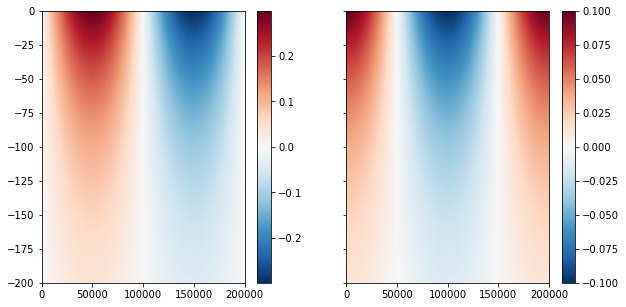

In [128]:
fig,ax = plt.subplots(1,2, figsize=(10,5),sharey=True)
h = ax[0].pcolormesh(x,z, V(x,z[:,None]), cmap='RdBu_r')
plt.colorbar(h,ax=ax[0])

h = ax[1].pcolormesh(x,z, Vx(x,z[:,None])/f, cmap='RdBu_r')
plt.colorbar(h,ax=ax[1])

In [129]:
def ode_sys(w,t):
    k,m,x,z = w
    f= gsw.f(40)
#     print(Vxx(x,z),Vzz(x,z),Vxz(x,z))
    dkdt = -0.5*Vxx(x,z) -0.5*Vzz(x,z)*k**2/m**2 +0.5*Vxz(x,z)*k/m
    dmdt = -0.5*Vxz(x,z) +0.5*Vzz(x,z)*k/m -0.5*N2z(z)*k**2/m**2/f 
    dxdt = N2(z)*k/m**2/f - 2*Vz(x,z)/m
    dzdt = -N2(z)*k**2/m**3/f + 2*Vz(x,z)*k/m**2
    return [dkdt,dmdt,dxdt,dzdt]

def omega(k,m,f_e,Vz):
    return f_e + N**2*k**2/(2*f*m**2) - Vz*k/m

In [130]:
numpoints = 60*24
dt = 60
f= gsw.f(40)
t = [i*dt for i in range(numpoints)]

k0=  -1/1000000
m0 = -1/700
x0= 1000
z0= 0

N = np.sqrt(1e-5)
# check frequency

w0 = [k0,m0,x0,z0]
wsol = odeint(ode_sys, w0, t,)

f_e = np.sqrt( f*(f+Vx(x0,z0)) )

In [133]:
omega(k0,m0,f_e,Vz(x0,z0))/f_e

0.9995950087225479

In [136]:
k0*Vz(x0,z0)/m0

6.596259406406942e-08

In [138]:
N**2*k0**2/(2*f*m0**2)

2.6134553389572236e-08

In [140]:
f_e

9.83429591991923e-05

In [134]:
omega(k0,m0,f_e,Vz(x0,z0))/f

1.0486156855609818

In [142]:
f/f_e

0.9532520088022438

In [135]:
k0/m0, 0.5*gsw.f(40)/np.sqrt(1e-5)

(0.0007, 0.014822484532113408)

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/colorbar.py:916: RuntimeWarning: overflow encountered in add
  self._values = 0.5 * (self._boundaries[:-1]


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2194: RuntimeWarning: overflow encountered in multiply
  ticks = np.arange(low, high + 1) * step + best_vmin
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:708: RuntimeWarning: overflow encountered in double_scalars
  if abs_min // 10 ** oom != abs_max // 10 ** oom)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:709: RuntimeWarning: overflow encountered in double_scalars
  if (abs_max - abs_min) / 10 ** oom <= 1e-2:
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:715: RuntimeWarning: overflow encountered in double_scalars
  if abs_max // 10 ** oom - abs_min // 10 ** oom > 1)


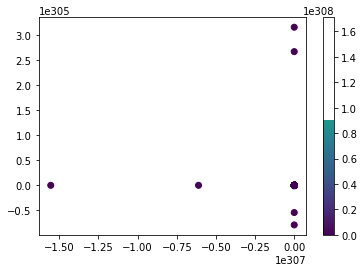

In [122]:
plt.scatter(wsol[:,2], wsol[:,3], c=np.abs(wsol[:,1]), cmap='viridis')
plt.colorbar()

(0.0, 200000.0)

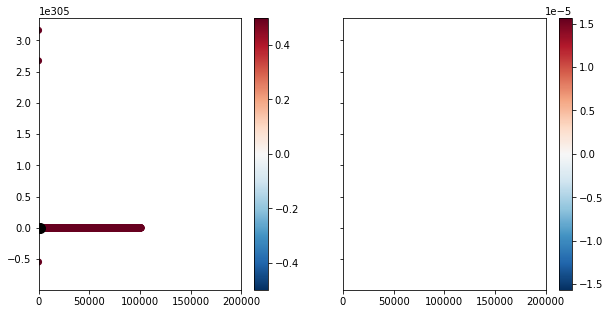

In [123]:
fig,ax = plt.subplots(1,2, figsize=(10,5),sharey=True)
h = ax[0].pcolormesh(x,z, V(x,z[:,None]), cmap='RdBu_r')
ax[0].plot(x0,z0, markersize=10,marker='o', color='k')
ax[0].scatter(wsol[:,2],wsol[:,3],c=wsol[:,1],cmap='RdBu_r')
plt.colorbar(h,ax=ax[0])
# ax[0].set_ylim(-1,0)
ax[0].set_xlim(0,2e5)

h = ax[1].pcolormesh(x,z, Vx(x,z[:,None]), cmap='RdBu_r')
plt.colorbar(h,ax=ax[1])
# ax[1].set_ylim(-100,0)
ax[1].set_xlim(0,2e5)

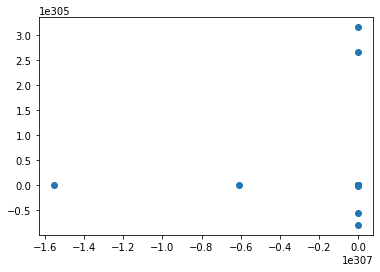

In [124]:
plt.plot(wsol[:,2],wsol[:,3],'o')

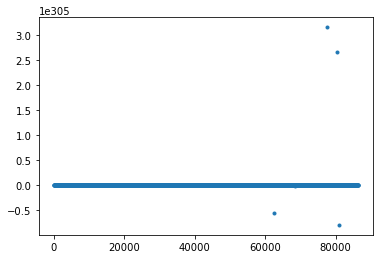

In [125]:
# plt.plot(t,wsol[:,2])
plt.plot(t,wsol[:,3],'.')

In [77]:
7*0.15*60*60*24/1000

90.72

In [78]:
35*111000/(14*30)/24/60/60

0.10706018518518519

In [79]:
100/(5*1.852)

10.799136069114471